## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = 'dataset/speed_matrix_2015'

# Read the pickle file into a DataFrame
df = pd.read_pickle(file_path)

In [3]:
df.head()

ID                   d005es15036  d005es15125  d005es15214  d005es15280  \
stamp                                                                     
2015-01-01 00:00:00    61.939138    64.280883    62.077397    60.786423   
2015-01-01 00:05:00    59.232527    65.082450    64.808345    65.853953   
2015-01-01 00:10:00    61.991801    65.309123    64.803916    64.266082   
2015-01-01 00:15:00    62.480655    65.191651    67.206597    63.988427   
2015-01-01 00:20:00    62.490484    65.287669    67.323285    64.707409   

ID                   d005es15315  d005es15348  d005es15410  d005es15465  \
stamp                                                                     
2015-01-01 00:00:00    63.120675    64.448315    63.411123    64.739481   
2015-01-01 00:05:00    59.206229    62.496716    65.992183    64.718051   
2015-01-01 00:10:00    62.239202    63.816610    60.196829    65.447790   
2015-01-01 00:15:00    65.808507    64.757556    62.011448    66.334476   
2015-01-01 00:20:00    65.708663    65.358370    65.091449    63.095048   

ID                   d005es15531  d005es15569  ...  i520es00526  i520es00560  \
stamp                                          ...                             
2015-01-01 00:00:00    63.009918    65.264902  ...    64.092842    60.397897   
2015-01-01 00:05:00    61.244073    65.608728  ...    64.244069    64.091079   
2015-01-01 00:10:00    63.797764    66.017157  ...    59.839932    63.624790   
2015-01-01 00:15:00    61.702734    65.735430  ...    65.230148    66.042141   
2015-01-01 00:20:00    62.186795    65.097373  ...    66.005431    61.455915   

ID                   i520es00624  i520es00684  i520es00714  i520es00746  \
stamp                                                                     
2015-01-01 00:00:00    62.045617    62.099860    63.555292    63.625611   
2015-01-01 00:05:00    65.082815    59.930435    63.817700    47.836660   
2015-01-01 00:10:00    57.179902    62.603473    64.117791    58.099941   
2015-01-01 00:15:00    61.952397    58.193563    55.949144    60.140768   
2015-01-01 00:20:00    62.117347    63.089581    62.961678    62.849955   

ID                   i520es00770  i520es00861  i520es00935  i520es00972  
stamp                                                                    
2015-01-01 00:00:00    62.118397    68.112571    66.567829    62.032062  
2015-01-01 00:05:00    54.307249    59.022999    58.949034    61.212069  
2015-01-01 00:10:00    58.923199    58.710086    56.671427    57.488732  
2015-01-01 00:15:00    57.117960    64.368119    57.892398    64.087189  
2015-01-01 00:20:00    54.681552    62.795588    62.545365    64.567285  

[5 rows x 323 columns]

## Feature Engineering

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105120 entries, 2015-01-01 00:00:00 to 2015-12-31 23:55:00
Columns: 323 entries, d005es15036 to i520es00972
dtypes: float64(323)
memory usage: 259.8+ MB


In [5]:
df.describe().T

count       mean        std       min        25%        50%  \
ID                                                                            
d005es15036  105120.0  57.845462   6.426844  4.840319  54.856138  59.650299   
d005es15125  105120.0  58.713051   9.658877  3.030836  54.805474  61.597271   
d005es15214  105120.0  56.441457  14.007021  2.242487  54.406209  61.194251   
d005es15280  105120.0  56.853393  11.592959  4.905045  55.548161  60.545027   
d005es15315  105120.0  55.868191  13.490229  2.505564  53.531277  60.130845   
...               ...        ...        ...       ...        ...        ...   
i520es00746  105120.0  64.028644   4.329268  3.468873  62.541430  64.619615   
i520es00770  105120.0  61.971703   5.204662  3.045591  60.557734  62.665405   
i520es00861  105120.0  65.093037   3.777748  3.411441  63.637006  65.646011   
i520es00935  105120.0  60.997861   6.196927  4.779597  59.365652  62.001465   
i520es00972  105120.0  61.391421   5.404591  3.028398  59.832899  62.367902   

                   75%        max  
ID                                 
d005es15036  62.296685  68.971886  
d005es15125  65.358363  72.890515  
d005es15214  65.025706  73.016079  
d005es15280  63.547338  71.857085  
d005es15315  64.123008  72.813118  
...                ...        ...  
i520es00746  66.396972  74.370029  
i520es00770  64.576573  72.636943  
i520es00861  67.302907  74.728502  
i520es00935  64.318079  73.599094  
i520es00972  64.537240  71.620627  

[323 rows x 8 columns]

In [6]:
# Check for missing values
missing_values = df.isnull().sum().sum()
print(f'Total missing values: {missing_values}')

Total missing values: 0


In [7]:
# Fill missing values (if any) with the forward fill method
# df = df.fillna(method='ffill').fillna(method='bfill')

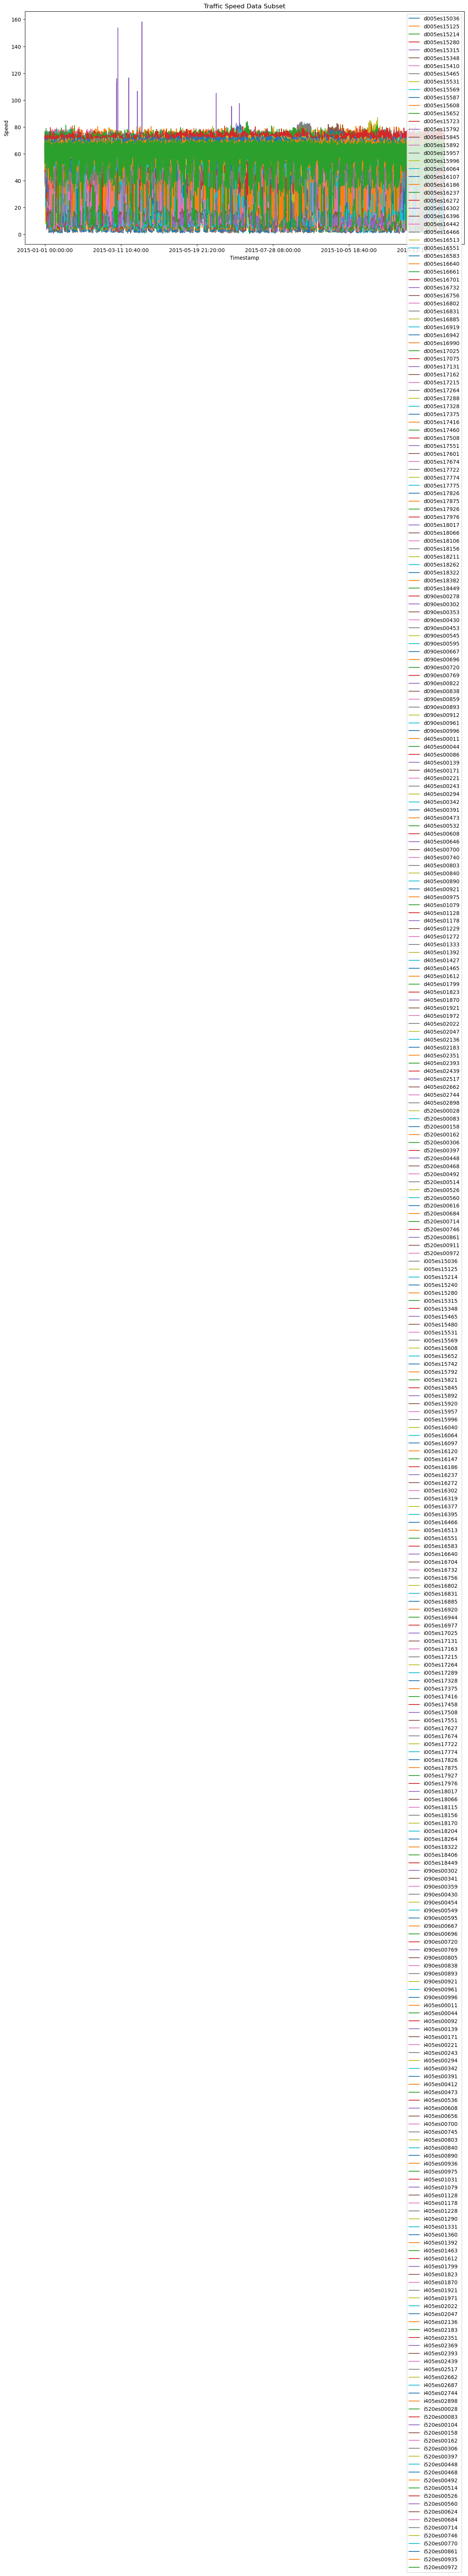

In [8]:
# Plot the subset with the specified figure size
df.plot(figsize=(15, 8))
plt.title('Traffic Speed Data Subset')
plt.xlabel('Timestamp')
plt.ylabel('Speed')
plt.legend(loc='upper right')
plt.show()

## Normalize the Data

In [4]:
from sklearn.preprocessing import MinMaxScaler

In [5]:
# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(df)


In [6]:
scaled_data

array([[0.89033874, 0.8767582 , 0.84544119, ..., 0.90723213, 0.89783034,
        0.86020917],
       [0.8481347 , 0.88823216, 0.88402829, ..., 0.77977916, 0.78712341,
        0.84825456],
       [0.89115991, 0.89147685, 0.88396571, ..., 0.77539153, 0.75402803,
        0.79397237],
       ...,
       [0.93017593, 0.91718625, 0.94769836, ..., 0.79959362, 0.89340964,
        0.89030317],
       [0.90475266, 0.89988036, 0.96709053, ..., 0.87956516, 0.85301469,
        0.85187844],
       [0.91309088, 0.9202261 , 0.92271896, ..., 0.85140445, 0.85846377,
        0.89448269]])

In [12]:
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

scaled_df.plot(figsize=(15, 8))
plt.title('Scaled Traffic Speed Data Subset')
plt.xlabel('Timestamp')
plt.ylabel('Scaled Speed')
plt.legend(loc='upper right')
plt.show()

## Creating Sequences

In [7]:
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [8]:
# Define the sequence length
seq_length = 10

# Create sequences
X, y = create_sequences(scaled_data, seq_length)

## Split the Data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

In [11]:
X_train.shape

(84088, 10, 323)

In [18]:
y_train.shape

(84088, 323)

In [19]:
X_test.shape

(21022, 10, 323)

## Build and Train the Unidirectional LSTM Model

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Masking
from tensorflow.keras.optimizers import Adam

In [26]:
# Build the Unidirectional LSTM model
unidirectional_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, X.shape[2])),
    Dense(X.shape[2])
])

C:\Users\Irfan Arshad\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
# Compile the model
unidirectional_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [28]:
unidirectional_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                        │ (None, 50)                  │          74,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 323)                 │          16,473 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,273 (356.54 KB)

 Trainable params: 91,273 (356.54 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# Train the model
unidirectional_history = unidirectional_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 28s 9ms/step - loss: 0.0402 - val_loss: 0.0096
Epoch 2/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0070 - val_loss: 0.0084
Epoch 3/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0060 - val_loss: 0.0078
Epoch 4/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0056 - val_loss: 0.0075
Epoch 5/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - loss: 0.0055 - val_loss: 0.0074


## Build and Train the Bidirectional LSTM Model

In [13]:
from tensorflow.keras.layers import Bidirectional

In [14]:
# Build the Bidirectional LSTM model
bidirectional_model = Sequential([
    Bidirectional(LSTM(50, activation='relu'), input_shape=(seq_length, X.shape[2])),
    Dense(X.shape[2])
])

C:\Users\Irfan Arshad\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [21]:
bidirectional_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 100)                 │         149,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 323)                 │          32,623 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 546,671 (2.09 MB)

 Trainable params: 182,223 (711.81 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 364,448 (1.39 MB)

In [15]:
# Compile the model
bidirectional_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [16]:
# Train the model
bidirectional_history = bidirectional_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - loss: 0.0314 - val_loss: 0.0091
Epoch 2/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0066 - val_loss: 0.0078
Epoch 3/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0057 - val_loss: 0.0070
Epoch 4/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0052 - val_loss: 0.0065
Epoch 5/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 23s 10ms/step - loss: 0.0049 - val_loss: 0.0061


## Stacked SBU_LSTM Model

In [17]:
# Build the SBU-LSTM model
def build_sbu_lstm_model(input_shape):
    model = Sequential()
    model.add(Masking(mask_value=0., input_shape=input_shape))  # Masking layer for missing values
    model.add(Bidirectional(LSTM(50, activation='relu', return_sequences=True)))
    model.add(LSTM(50, activation='relu'))
    model.add(Dense(input_shape[1]))  # Output layer with the same number of features as input
    return model

In [18]:
input_shape = (seq_length, X.shape[2])
sbu_lstm_model = build_sbu_lstm_model(input_shape)

C:\Users\Irfan Arshad\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\masking.py:47: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [22]:
sbu_lstm_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ masking (Masking)                    │ (None, 10, 323)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 10, 100)             │         149,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 50)                  │          30,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 323)                 │          16,473 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 196,273 (766.69 KB)

 Trainable params: 196,273 (766.69 KB)

 Non-trainable params: 0 (0.00 B)

In [23]:
# Compile the model
sbu_lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

In [24]:
# Train the model
sbu_lstm_history = sbu_lstm_model.fit(X_train, y_train, epochs=5, batch_size=32, validation_split=0.1)

Epoch 1/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 68s 20ms/step - loss: 0.0330 - val_loss: 0.0093
Epoch 2/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - loss: 0.0067 - val_loss: 0.0081
Epoch 3/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 43s 18ms/step - loss: 0.0058 - val_loss: 0.0074
Epoch 4/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 49s 21ms/step - loss: 0.0053 - val_loss: 0.0069
Epoch 5/5
2365/2365 ━━━━━━━━━━━━━━━━━━━━ 45s 19ms/step - loss: 0.0050 - val_loss: 0.0066


## Evaluate the Models

In [30]:
# Evaluate the Unidirectional LSTM model
unidirectional_loss = unidirectional_model.evaluate(X_test, y_test)
print(f'Unidirectional LSTM Loss: {unidirectional_loss}')

# Evaluate the Bidirectional LSTM model
bidirectional_loss = bidirectional_model.evaluate(X_test, y_test)
print(f'Bidirectional LSTM Loss: {bidirectional_loss}')

# Evaluate the SBU_model
sbu_lstm_loss = sbu_lstm_model.evaluate(X_test, y_test)
print(f'SBU-LSTM Loss: {sbu_lstm_loss}')

657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0071
Unidirectional LSTM Loss: 0.006691823713481426
657/657 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0060
Bidirectional LSTM Loss: 0.005749367643147707
657/657 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.0063
SBU-LSTM Loss: 0.0059654894284904


## Uni_LSTM Validation

In [31]:
pred_scaled_1 = sbu_lstm_model.predict(X_test)

predicted_1 = scaler.inverse_transform(pred_scaled_1)
actual_1 = scaler.inverse_transform(y_test)

pred_df_1 = pd.DataFrame(predicted_1, columns=df.columns)
act_df_1 = pd.DataFrame(actual_1, columns=df.columns)

657/657 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step


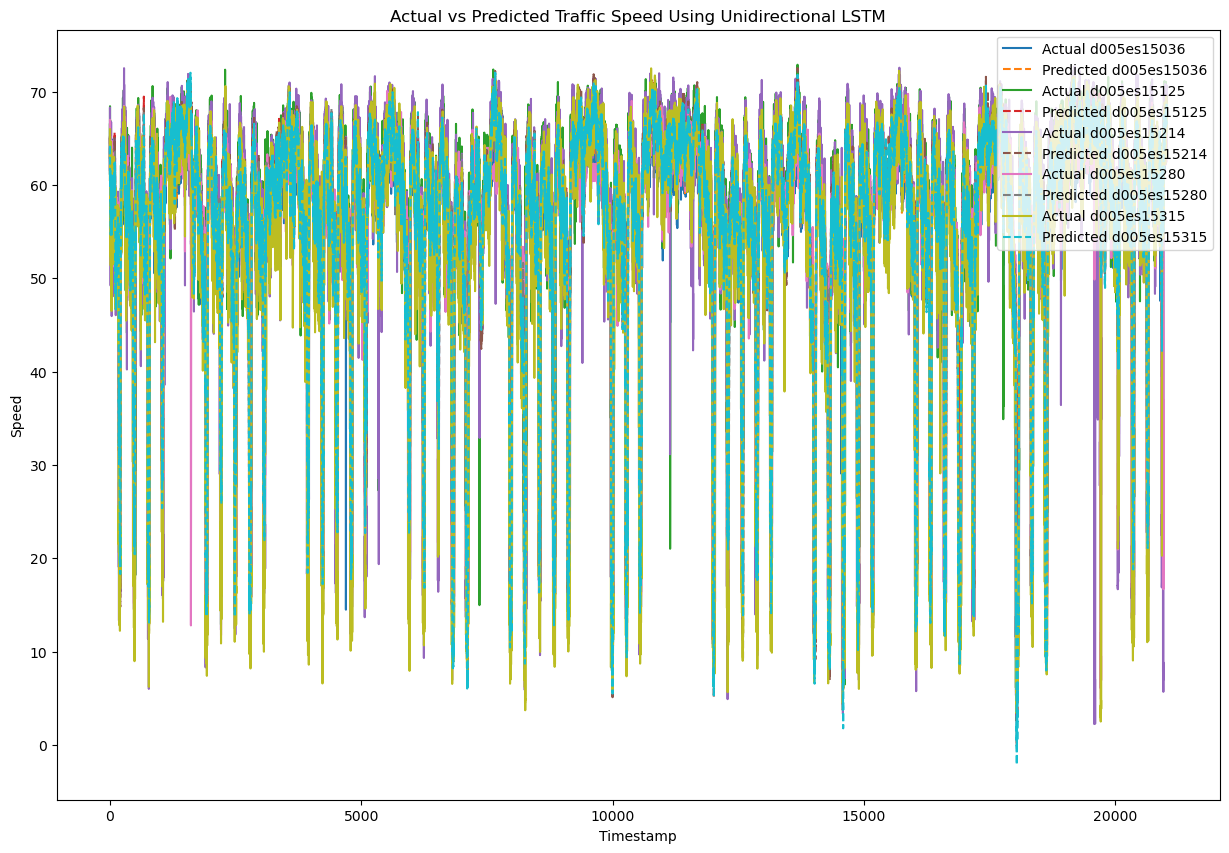

In [46]:
def plot_first_10_columns(act_df_1, pred_df_1):
    # Limit to first 10 columns or the actual number of columns if less than 10
    num_columns = min(5, act_df_1.shape[1])
    
    plt.figure(figsize=(15, 10))
    for col in act_df_1.columns[:num_columns]:
        plt.plot(act_df_1.index, act_df_1[col], label=f'Actual {col}')
        plt.plot(pred_df_1.index, pred_df_1[col], linestyle='--', label=f'Predicted {col}')
    plt.title('Actual vs Predicted Traffic Speed Using Unidirectional LSTM')
    plt.xlabel('Timestamp')
    plt.ylabel('Speed')
    plt.legend(loc='upper right')
    plt.show()

# Plot the actual vs predicted values for the first 10 columns
plot_first_10_columns(act_df_1, pred_df_1)

## Bid_LSTM Validation

In [32]:
pred_scaled_2 = sbu_lstm_model.predict(X_test)

predicted_2 = scaler.inverse_transform(pred_scaled_2)
actual_2 = scaler.inverse_transform(y_test)

pred_df_2 = pd.DataFrame(predicted_2, columns=df.columns)
act_df_2 = pd.DataFrame(actual_2, columns=df.columns)

657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step


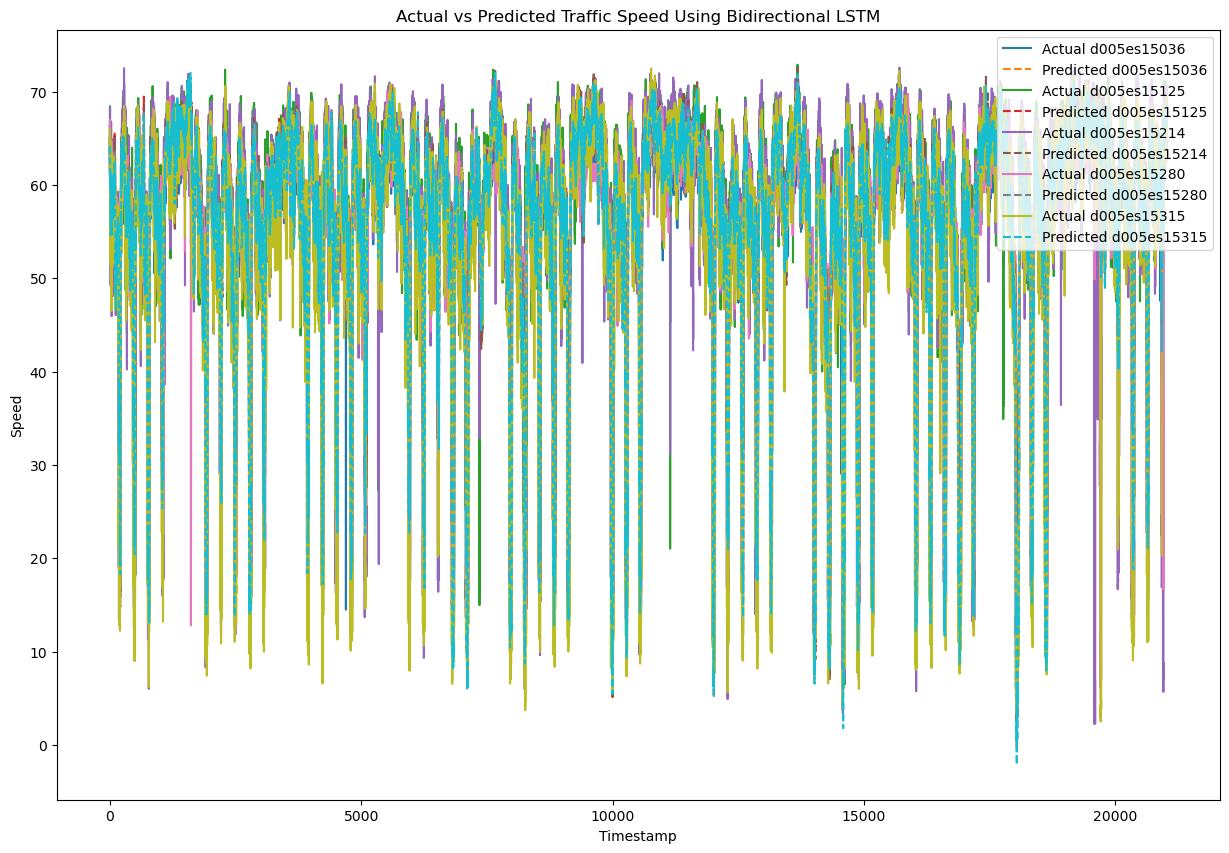

In [48]:
def plot_columns(act_df_2, pred_df_2):
    # Limit to the first 10 columns
    num_columns = min(5, act_df_1.shape[1])
    
    plt.figure(figsize=(15, 10))
    for col in act_df_2.columns[:num_columns]:
        plt.plot(act_df_2.index, act_df_2[col], label=f'Actual {col}')
        plt.plot(pred_df_2.index, pred_df_2[col], linestyle='--', label=f'Predicted {col}')
    plt.title('Actual vs Predicted Traffic Speed Using Bidirectional LSTM')
    plt.xlabel('Timestamp')
    plt.ylabel('Speed')
    plt.legend(loc='upper right')
    plt.show()

# Plot the actual vs predicted values for the first 10 columns
plot_columns(act_df_2, pred_df_2)

## SBU_LSTM Validation

In [33]:
predicted_scaled = sbu_lstm_model.predict(X_test)

predicted = scaler.inverse_transform(predicted_scaled)
actual = scaler.inverse_transform(y_test)

predicted_df = pd.DataFrame(predicted, columns=df.columns)
actual_df = pd.DataFrame(actual, columns=df.columns)

657/657 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step


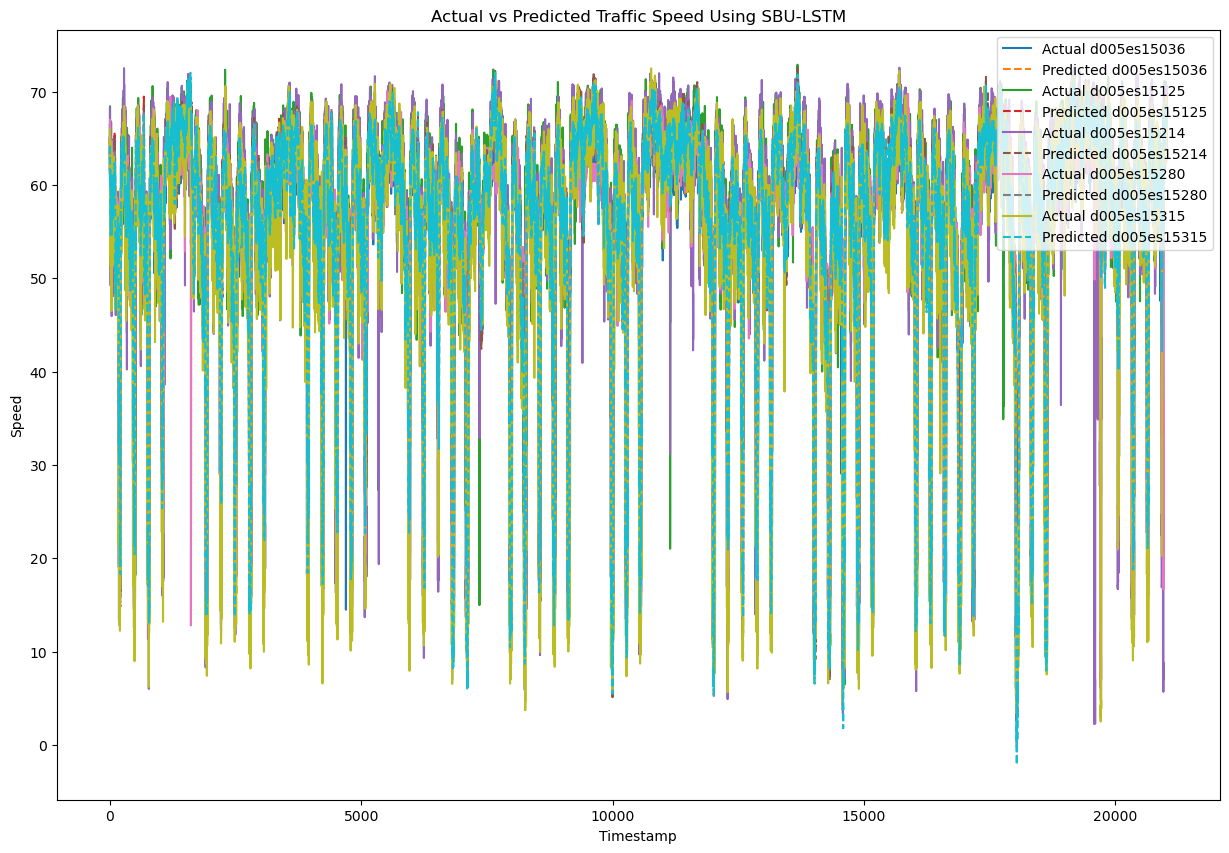

In [53]:
def plot_columns(actual_df, predicted_df):
    # Limit to the first 10 columns
    num_columns = min(5, act_df_1.shape[1])
    
    plt.figure(figsize=(15, 10))
    for col in actual_df.columns[:num_columns]:
        plt.plot(actual_df.index, actual_df[col], label=f'Actual {col}')
        plt.plot(predicted_df.index, predicted_df[col], linestyle='--', label=f'Predicted {col}')
    plt.title('Actual vs Predicted Traffic Speed Using SBU-LSTM')
    plt.xlabel('Timestamp')
    plt.ylabel('Speed')
    plt.legend(loc='upper right')
    plt.show()

# Plot the actual vs predicted values for the first 10 columns
plot_columns(actual_df, predicted_df)

## Saving Trained Models

In [34]:
# Save the Unidirectional LSTM model
unidirectional_model.save('unidirectional_lstm_model.h5')

In [35]:
# Save the Bidirectional LSTM model
bidirectional_model.save('bidirectional_lstm_model.h5')

ValueError: Unable to synchronously create dataset (name already exists)

In [36]:
# Save the sbu_model
sbu_lstm_model.save('sbu_lstm_model.h5')

ValueError: Unable to synchronously create dataset (name already exists)

## Plotting Loss Values

In [37]:
import matplotlib.pyplot as plt

In [38]:
# Plot training and validation loss for Unidirectional LSTM
plt.figure(figsize=(12, 6))
plt.plot(unidirectional_history.history['loss'], label='Train Loss')
plt.plot(unidirectional_history.history['val_loss'], label='Validation Loss')
plt.title('Unidirectional LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


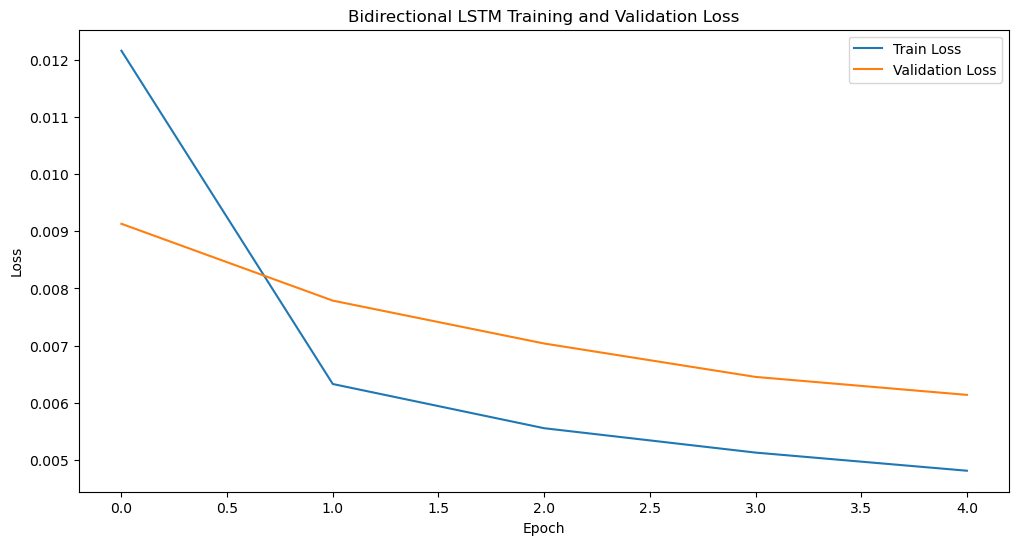

In [39]:
# Plot training and validation loss for Bidirectional LSTM
plt.figure(figsize=(12, 6))
plt.plot(bidirectional_history.history['loss'], label='Train Loss')
plt.plot(bidirectional_history.history['val_loss'], label='Validation Loss')
plt.title('Bidirectional LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

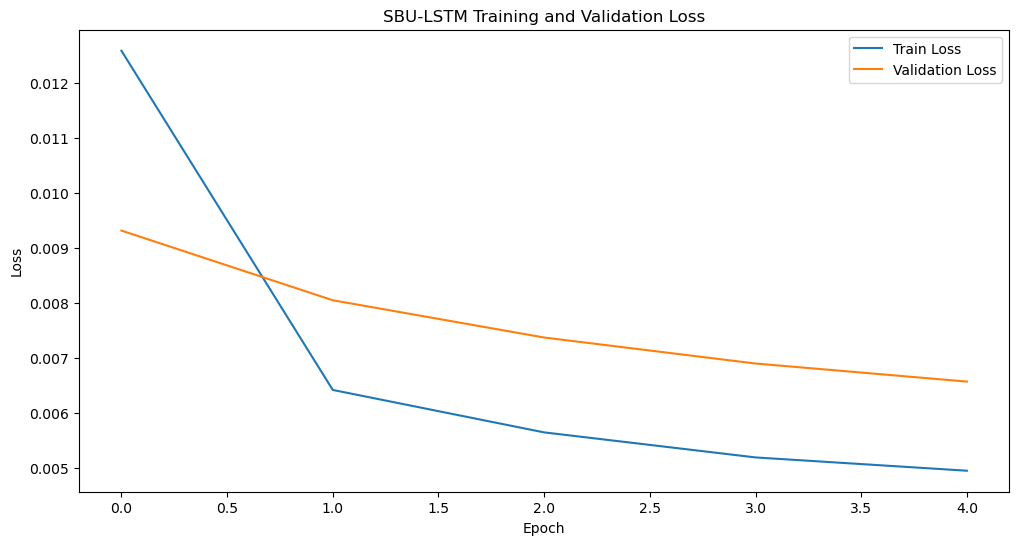

In [40]:
# Plot training and validation loss
plt.figure(figsize=(12, 6))
plt.plot(sbu_lstm_history.history['loss'], label='Train Loss')
plt.plot(sbu_lstm_history.history['val_loss'], label='Validation Loss')
plt.title('SBU-LSTM Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

________________________________________________________________________________________________________________________________